In [1]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
from functools import reduce
import seaborn as sns

In [2]:
# This code is used to grab a URL, verify it, and then save it as a variable if it is valid.
url = 'https://www.pro-football-reference.com/teams/nyg/2021.htm'
response = requests.get(url)
status = response.status_code
if status == 200:
    page = response.text
    soup = bs(page)
else:
    print(f"Recieved status code {status}")

In [4]:
#This function grabs the team stat table over multiple pages and scrapes all the data present
def get_teamStats(soup,year):
    team_stats = pd.DataFrame(columns=['player','Turnovers','Time_PerDrive','NumPlays_PerDrive','AvgYds_PerDrive'])
    columns = soup.find(id = "team_stats").tbody
    for row in columns.find_all('tr'):
        
        player = row.find(attrs={'data-stat':'player','scope':'row'}).text
        ydsOf = row.find(attrs={'data-stat' : 'yds_per_play_offense'}).text
        to = row.find(attrs={'data-stat' : 'turnovers'}).text
        time_per = row.find(attrs={'data-stat':'time_avg'}).text
        numplays = row.find(attrs={'data-stat':'plays_per_drive'}).text
        avgYds = row.find(attrs={'data-stat':'yds_per_drive'}).text
        
        team_stats = team_stats.append({'player':player,
                    'Yards_per_Play':ydsOf,
                    'Turnovers':to,
                    'Time_PerDrive':time_per,
                    'NumPlays_PerDrive':numplays,
                    'AvgYds_PerDrive':avgYds}, ignore_index = True)
        
        t ='Team Stats'
        o = 'Opp. Stats'
        ro = 'Lg Rank Offense'
        rd = 'Lg Rank Deffense'
        
        team_stats.replace('Team Stats',year +' '+ t, inplace = True)
        team_stats.replace('Opp. Stats',year +' '+ o, inplace = True)
        team_stats.replace('Lg Rank Offense',year +' '+ ro, inplace = True)
        team_stats.replace('Lg Rank Defense',year +' '+ rd, inplace = True)
    
    return(team_stats)

In [5]:

g2021 = get_teamStats(soup,'2021')

In [142]:
# wins and losses were not in the tables but are important for insights so I manually added them for each year
g2021['Wins']=[4,'','','']
g2021['Losses']=[13,'','','']

In [7]:
g2021

,player,Turnovers,Time_PerDrive,NumPlays_PerDrive,AvgYds_PerDrive,Yards_per_Play,Wins,Losses
0,2021 Team Stats,30,2:35,5.73,25.7,4.7,4,13
1,2021 Opp. Stats,22,2:55,6.4,32.8,5.3,,
2,2021 Lg Rank Offense,32,27,26,31,,,
3,2021 Lg Rank Deffense,14,22,28,21,,,


In [8]:
url = 'https://www.pro-football-reference.com/teams/nyg/2020.htm'
response = requests.get(url)
status = response.status_code
if status == 200:
    page = response.text
    soup = bs(page)
else:
    print(f"Recieved status code {status}")

In [10]:
g2020 = get_teamStats(soup,'2020')

In [11]:
g2020['Wins']=[6,'','','']
g2020['Losses']=[10,'','','']

In [12]:
g2020

,player,Turnovers,Time_PerDrive,NumPlays_PerDrive,AvgYds_PerDrive,Yards_per_Play,Wins,Losses
0,2020 Team Stats,22,2:45,5.98,28.7,5.0,6,10
1,2020 Opp. Stats,22,3:03,6.6,34.0,5.3,,
2,2020 Lg Rank Offense,20,18,21,26,,,
3,2020 Lg Rank Deffense,10,29,31,18,,,


In [13]:
url = 'https://www.pro-football-reference.com/teams/nyg/2019.htm'
response = requests.get(url)
status = response.status_code
if status == 200:
    page = response.text
    soup = bs(page)
else:
    print(f"Recieved status code {status}")

In [14]:
type(soup)

bs4.BeautifulSoup

In [15]:
g2019 = get_teamStats(soup,'2019')

In [16]:
g2019['Wins'] = [4,'','','']
g2019['Losses']=[12,'','','']

In [17]:
g2019

,player,Turnovers,Time_PerDrive,NumPlays_PerDrive,AvgYds_PerDrive,Yards_per_Play,Wins,Losses
0,2019 Team Stats,33,2:29,5.56,29.2,5.4,4,12
1,2019 Opp. Stats,16,2:44,5.9,32.4,5.7,,
2,2019 Lg Rank Offense,30,26,27,23,,,
3,2019 Lg Rank Deffense,28,19,16,20,,,


In [18]:
url = 'https://www.pro-football-reference.com/teams/nyg/2018.htm'
response = requests.get(url)
status = response.status_code
if status == 200:
    page = response.text
    soup = bs(page)
else:
    print(f"Recieved status code {status}")

In [19]:
type(soup)

bs4.BeautifulSoup

In [20]:
g2018 = get_teamStats(soup,'2018')

In [21]:
g2018

,player,Turnovers,Time_PerDrive,NumPlays_PerDrive,AvgYds_PerDrive,Yards_per_Play
0,2018 Team Stats,19,2:37,5.79,32.2,5.8
1,2018 Opp. Stats,21,2:47,5.9,32.7,5.7
2,2018 Lg Rank Offense,11,25,19,15,
3,2018 Lg Rank Deffense,15,22,23,22,


In [22]:
g2018['Wins']=[5,'','','']
g2018['Losses']=[11,'','','']

In [23]:
g2018

,player,Turnovers,Time_PerDrive,NumPlays_PerDrive,AvgYds_PerDrive,Yards_per_Play,Wins,Losses
0,2018 Team Stats,19,2:37,5.79,32.2,5.8,5,11
1,2018 Opp. Stats,21,2:47,5.9,32.7,5.7,,
2,2018 Lg Rank Offense,11,25,19,15,,,
3,2018 Lg Rank Deffense,15,22,23,22,,,


In [24]:
url = 'https://www.pro-football-reference.com/teams/nyg/2017.htm'
response = requests.get(url)
status = response.status_code
if status == 200:
    page = response.text
    soup = bs(page)
else:
    print(f"Recieved status code {status}")

In [25]:
type(soup)

bs4.BeautifulSoup

In [26]:
g2017 = get_teamStats(soup,'2017')

In [27]:
g2017['Wins']=[3,'','','']
g2017['Losses']=[13,'','','']

In [28]:
url = 'https://www.pro-football-reference.com/teams/nyg/2016.htm'
response = requests.get(url)
status = response.status_code
if status == 200:
    page = response.text
    soup = bs(page)
else:
    print(f"Recieved status code {status}")

In [29]:
type(soup)

bs4.BeautifulSoup

In [30]:
g2016 = get_teamStats(soup,'2016')

In [31]:
g2016['Wins']=[11,'','','']
g2016['Losses']=[5,'','','']

In [32]:
url = 'https://www.pro-football-reference.com/teams/nyg/2015.htm'
response = requests.get(url)
status = response.status_code
if status == 200:
    page = response.text
    soup = bs(page)
else:
    print(f"Recieved status code {status}")

In [33]:
type(soup)

bs4.BeautifulSoup

In [34]:
g2015 = get_teamStats(soup,'2015')

In [35]:
g2015['Wins']=[6,'','','']
g2015 ['Losses']=[10,'','','']

In [36]:
g2015

,player,Turnovers,Time_PerDrive,NumPlays_PerDrive,AvgYds_PerDrive,Yards_per_Play,Wins,Losses
0,2015 Team Stats,21,2:27,5.83,32.0,5.7,6,10
1,2015 Opp. Stats,28,2:42,6.0,35.2,6.1,,
2,2015 Lg Rank Offense,13,24,11,8,,,
3,2015 Lg Rank Deffense,6,25,31,31,,,


In [37]:
g2016

,player,Turnovers,Time_PerDrive,NumPlays_PerDrive,AvgYds_PerDrive,Yards_per_Play,Wins,Losses
0,2016 Team Stats,27,2:21,5.40,27.4,5.2,11,5
1,2016 Opp. Stats,25,2:34,5.6,27.6,5.1,,
2,2016 Lg Rank Offense,24,30,28,27,,,
3,2016 Lg Rank Deffense,11,8,9,6,,,


In [38]:
g2017

,player,Turnovers,Time_PerDrive,NumPlays_PerDrive,AvgYds_PerDrive,Yards_per_Play,Wins,Losses
0,2017 Team Stats,22,2:22,5.48,25.9,4.9,3,13
1,2017 Opp. Stats,19,2:35,5.5,30.3,5.7,,
2,2017 Lg Rank Offense,14,31,25,26,,,
3,2017 Lg Rank Deffense,23,15,9,23,,,


In [39]:
g2018

,player,Turnovers,Time_PerDrive,NumPlays_PerDrive,AvgYds_PerDrive,Yards_per_Play,Wins,Losses
0,2018 Team Stats,19,2:37,5.79,32.2,5.8,5,11
1,2018 Opp. Stats,21,2:47,5.9,32.7,5.7,,
2,2018 Lg Rank Offense,11,25,19,15,,,
3,2018 Lg Rank Deffense,15,22,23,22,,,


In [40]:
g2019

,player,Turnovers,Time_PerDrive,NumPlays_PerDrive,AvgYds_PerDrive,Yards_per_Play,Wins,Losses
0,2019 Team Stats,33,2:29,5.56,29.2,5.4,4,12
1,2019 Opp. Stats,16,2:44,5.9,32.4,5.7,,
2,2019 Lg Rank Offense,30,26,27,23,,,
3,2019 Lg Rank Deffense,28,19,16,20,,,


In [41]:
g2020

,player,Turnovers,Time_PerDrive,NumPlays_PerDrive,AvgYds_PerDrive,Yards_per_Play,Wins,Losses
0,2020 Team Stats,22,2:45,5.98,28.7,5.0,6,10
1,2020 Opp. Stats,22,3:03,6.6,34.0,5.3,,
2,2020 Lg Rank Offense,20,18,21,26,,,
3,2020 Lg Rank Deffense,10,29,31,18,,,


In [42]:
g2021

,player,Turnovers,Time_PerDrive,NumPlays_PerDrive,AvgYds_PerDrive,Yards_per_Play,Wins,Losses
0,2021 Team Stats,30,2:35,5.73,25.7,4.7,4,13
1,2021 Opp. Stats,22,2:55,6.4,32.8,5.3,,
2,2021 Lg Rank Offense,32,27,26,31,,,
3,2021 Lg Rank Deffense,14,22,28,21,,,


In [43]:
# put all df's in a list for an easy concat statement
data_frames = [g2015,g2016,g2017,g2018,g2019,g2020,g2021]


In [44]:
#concat df's together using the list, ignore index is important to avoid repeating index.
df_concat = pd.concat(
                data_frames,
                axis=0,
                join='outer',
                ignore_index=True)
df_concat

,player,Turnovers,Time_PerDrive,NumPlays_PerDrive,AvgYds_PerDrive,Yards_per_Play,Wins,Losses
0,2015 Team Stats,21,2:27,5.83,32.0,5.7,6,10
1,2015 Opp. Stats,28,2:42,6.0,35.2,6.1,,
2,2015 Lg Rank Offense,13,24,11,8,,,
3,2015 Lg Rank Deffense,6,25,31,31,,,
4,2016 Team Stats,27,2:21,5.40,27.4,5.2,11,5
5,2016 Opp. Stats,25,2:34,5.6,27.6,5.1,,
6,2016 Lg Rank Offense,24,30,28,27,,,
7,2016 Lg Rank Deffense,11,8,9,6,,,
8,2017 Team Stats,22,2:22,5.48,25.9,4.9,3,13
9,2017 Opp. Stats,19,2:35,5.5,30.3,5.7,,


In [45]:
df_concat.columns

Index(['player', 'Turnovers', 'Time_PerDrive', 'NumPlays_PerDrive',
       'AvgYds_PerDrive', 'Yards_per_Play', 'Wins', 'Losses'],
      dtype='object')

In [46]:
#Made a new df to only hold the Team Stats
team_values = df_concat[df_concat['player'].isin(['2015 Team Stats','2016 Team Stats','2017 Team Stats','2018 Team Stats','2019 Team Stats','2020 Team Stats','2021 Team Stats'])]

team_values

,player,Turnovers,Time_PerDrive,NumPlays_PerDrive,AvgYds_PerDrive,Yards_per_Play,Wins,Losses
0,2015 Team Stats,21,2:27,5.83,32.0,5.7,6,10
4,2016 Team Stats,27,2:21,5.40,27.4,5.2,11,5
8,2017 Team Stats,22,2:22,5.48,25.9,4.9,3,13
12,2018 Team Stats,19,2:37,5.79,32.2,5.8,5,11
16,2019 Team Stats,33,2:29,5.56,29.2,5.4,4,12
20,2020 Team Stats,22,2:45,5.98,28.7,5.0,6,10
24,2021 Team Stats,30,2:35,5.73,25.7,4.7,4,13


# Heatmap for the Team Stats
Some correlations to explore:
- Wins and yards per play
- Wins and average yards per drive
- losses and number of plays per drive
- number of plays per drive and yards per play

<AxesSubplot:>

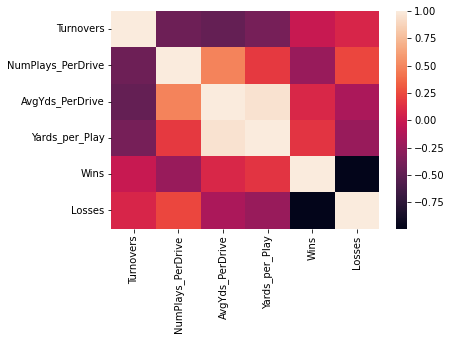

In [47]:
sns.heatmap(team_values.drop(columns=['player','Time_PerDrive']).astype('float').corr())


In [91]:
new = team_values.sort_values(by=['Yards_per_Play'],ascending = True)

# Barplot to visualize correlation between wins and yards per play

There seems to be almost no correlation in these two variables. It is notable that the seasons with the least amount of wins from the sample did in fact have the least amount of average yards per play

<AxesSubplot:xlabel='Yards_per_Play', ylabel='Wins'>

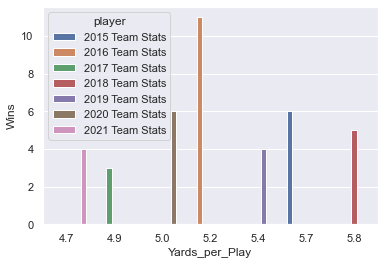

In [92]:
sns.set_theme(style='darkgrid')
sns.barplot(y=team_values['Wins'],x=new['Yards_per_Play'],hue = team_values['player'],ci=200)

In [96]:
sortbynumplays = team_values.sort_values(by=['NumPlays_PerDrive'],ascending = True)

# Barplot to visualize correlation between losses and plays per drive

There is no correlation between losses and number of plays per drive.

The team has had a consistant negative record over the sample so it will be hard to find many differences between years.

It is interesting that the team with the best record over the sample actually had the least number of plays per drive. This really shows how dominant the defense was that year.

<AxesSubplot:xlabel='NumPlays_PerDrive', ylabel='Losses'>

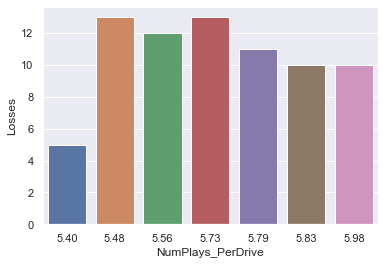

In [100]:
sns.barplot(y=team_values['Losses'],x=sortbynumplays['NumPlays_PerDrive'])

In [105]:
#Made a new df to only look at The offensive ranks
of_lg_rank = df_concat[df_concat['player'].isin(['2015 Lg Rank Offense','2016 Lg Rank Offense','2017 Lg Rank Offense','2018 Lg Rank Offense','2019 Lg Rank Offense','2020 Lg Rank Offense','2021 Lg Rank Offense'])]
of_lg_rank

,player,Turnovers,Time_PerDrive,NumPlays_PerDrive,AvgYds_PerDrive,Yards_per_Play,Wins,Losses
2,2015 Lg Rank Offense,13,24,11,8,,,
6,2016 Lg Rank Offense,24,30,28,27,,,
10,2017 Lg Rank Offense,14,31,25,26,,,
14,2018 Lg Rank Offense,11,25,19,15,,,
18,2019 Lg Rank Offense,30,26,27,23,,,
22,2020 Lg Rank Offense,20,18,21,26,,,
26,2021 Lg Rank Offense,32,27,26,31,,,


In [108]:
# made a new df to only look at the defensive ranks
df_lg_rank = df_concat[df_concat['player'].isin(['2015 Lg Rank Deffense','2016 Lg Rank Deffense','2017 Lg Rank Deffense','2018 Lg Rank Deffense','2019 Lg Rank Deffense','2020 Lg Rank Deffense','2021 Lg Rank Deffense'])]
df_lg_rank

,player,Turnovers,Time_PerDrive,NumPlays_PerDrive,AvgYds_PerDrive,Yards_per_Play,Wins,Losses
3,2015 Lg Rank Deffense,6,25,31,31,,,
7,2016 Lg Rank Deffense,11,8,9,6,,,
11,2017 Lg Rank Deffense,23,15,9,23,,,
15,2018 Lg Rank Deffense,15,22,23,22,,,
19,2019 Lg Rank Deffense,28,19,16,20,,,
23,2020 Lg Rank Deffense,10,29,31,18,,,
27,2021 Lg Rank Deffense,14,22,28,21,,,


In [135]:
#datatypes were objects and needed ints for .mean
of_lg_rank = of_lg_rank.astype({'Turnovers':'int64'})
df_lg_rank = df_lg_rank.astype({'Turnovers':'int64'})

# How have the giants ranked offensivley and defensivley in turnovers over the past 7 years?

In [126]:
rank_oTurn = round(of_lg_rank['Turnovers'].mean())
rank_dTurn = round(df_lg_rank['Turnovers'].mean())

In [141]:
print('Over the past 7 years the giants have been the', rank_oTurn ,'ranked team in offensive turnovers\nand have been the',rank_dTurn,'in turnovers forced')

Over the past 7 years the giants have been the 21 ranked team in offensive turnovers
and have been the 15 in turnovers forced


- The giants have been a below average team when it comes to turning the ball over but are an abover average team when it comes to forcing turnovers.

In [136]:
of_lg_rank = of_lg_rank.astype({'Time_PerDrive':'int'})

# How have the Giants ranked offensivley in time per drive over the past 7 years ?

In [138]:
rank_oTime = round(of_lg_rank['Time_PerDrive'].mean())

In [140]:
print('Over the past 7 years the Giants have been ranked',rank_oTime,'in length of offensive drives')

Over the past 7 years the Giants have been ranked 26 in length of offensive drives


- This is a killer
- Not being able to stick out long drives leaves the other team in control of the flow
- The defense has less time to rest
- Shorter drives need constant big plays to score, which is an unreliable gameplan